In [2]:
import numpy as np
import pandas as pd

df=pd.read_csv(r"C:\Users\harshit\Downloads\REGRESSION\encoding\homedata1.csv")
df

,town,area,price
0,monroetownhip,2600,550000
1,monroetownhip,3000,565000
2,monroetownhip,3200,610000
3,monroetownhip,3600,680000
4,monroetownhip,4000,725000
5,westwindsor,2600,585000
6,westwindsor,2800,615000
7,westwindsor,3300,650000
8,westwindsor,3600,710000
9,robinsville,2600,575000


In [4]:
# crreating dummy variables for town

dums=pd.get_dummies(df.town)
dums

,monroetownhip,robinsville,westwindsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [5]:
# adding dummies to dataframe

df_1=pd.concat([df,dums],axis='columns')
df_1

,town,area,price,monroetownhip,robinsville,westwindsor
0,monroetownhip,2600,550000,1,0,0
1,monroetownhip,3000,565000,1,0,0
2,monroetownhip,3200,610000,1,0,0
3,monroetownhip,3600,680000,1,0,0
4,monroetownhip,4000,725000,1,0,0
5,westwindsor,2600,585000,0,0,1
6,westwindsor,2800,615000,0,0,1
7,westwindsor,3300,650000,0,0,1
8,westwindsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [6]:
# removing town column

df2=df_1.drop('town',axis=1)
df2

,area,price,monroetownhip,robinsville,westwindsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [7]:
#Dummy Variable Trap When you can derive one variable from other variables, they are known to be multi-colinear.
#Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0.
#There for these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. 
#Hence you need to drop one column.

df3=df2.drop('westwindsor',axis='columns')
df3

,area,price,monroetownhip,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model


In [9]:
x=df3.drop('price',axis='columns')
y=df3.price

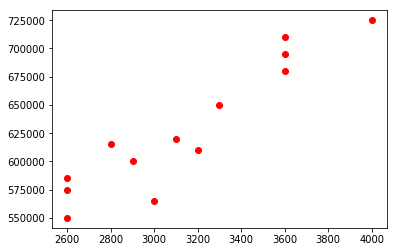

In [10]:
plt.scatter(df3.area,df3.price,color='r')

In [11]:
A=linear_model.LinearRegression()
A.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
A.predict(x)   # predicted values of y corresponding to each value of x

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [13]:
A.predict([[6215,0,1]])    # price of 6215 in robinsville

array([1024130.40206402])

In [14]:
A.predict([[6123,0,0]])    # price of 6123 in west windsor

array([1026783.401419])

In [15]:
A.score(x,y)

0.9573929037221873

In [16]:
import statsmodels.formula.api as smf

In [18]:
model=smf.ols('price ~ area + monroetownhip + robinsville',df3).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     67.41
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           1.73e-06
Time:                        12:36:30   Log-Likelihood:                -139.92
No. Observations:                  13   AIC:                             287.8
Df Residuals:                       9   BIC:                             290.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.498e+05   2.85e+04      8.755      0.000    1.85e+05    3.14e+05
area            126.8974      9.006     14.090      0.000     106.524     147.271
monroetownhip -4.001e+04   9396.108     -4.259      0.002   -6.13e+04   -1.88e+04
robinsville   -1.433e+04   9713.900     -1.475      0.174   -3.63e+04    7646.806
==============================================================================
Omnibus:                        3.110   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                1.863
Skew:                          -0.920   Prob(JB):                        0.394
Kurtosis:                       2.763   Cond. No.                     2.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model.predict({'area':6123,'monroetownhip':0,'robinsville':0})

0    1.026783e+06
dtype: float64

In [20]:
from sklearn.externals import joblib
joblib.dump(model,'trnd_mdl')
saved_model=joblib.load('trnd_mdl')

In [21]:
saved_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     67.41
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           1.73e-06
Time:                        12:36:35   Log-Likelihood:                -139.92
No. Observations:                  13   AIC:                             287.8
Df Residuals:                       9   BIC:                             290.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.498e+05   2.85e+04      8.755      0.000    1.85e+05    3.14e+05
area            126.8974      9.006     14.090      0.000     106.524     147.271
monroetownhip -4.001e+04   9396.108     -4.259      0.002   -6.13e+04   -1.88e+04
robinsville   -1.433e+04   9713.900     -1.475      0.174   -3.63e+04    7646.806
==============================================================================
Omnibus:                        3.110   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                1.863
Skew:                          -0.920   Prob(JB):                        0.394
Kurtosis:                       2.763   Cond. No.                     2.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
saved_model.predict({'area':6123,'monroetownhip':0,'robinsville':0})

0    1.026783e+06
dtype: float64

In [23]:
saved_model.predict({'area':5916,'monroetownhip':1,'robinsville':0})

0    960501.655558
dtype: float64